<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> IFTA: Análisis del espacio de las fases</font>
</div>

- **Para**: SLM

- **Fecha**: 2021/11/11
        
- **Autores**: 
    - Luis Miguel Sánchez Brea
    

- **Objetivos**: Estudiar cómo cambia es espacio A-$\phi$ cuando se ejecuta el algoritmo IFTA

- **Descripción** Ya que el algoritmo IFTA es convergente, esto querría decir, en el nuevo marco, que las distancias entre los campos inversos y los puntos de fabricabilidad son cada vez más cercanos. Veamos si es cierto

- **Referencias**: -

# New technique to optimize SLM

**Autor**: Luis Miguel Sánchez Brea

**Fecha**: 04/11/2021

**Objetivo**: Teluro: Desarrollar un procedimiento de optimización estructuras DOEs generadas por SLM.

# Descripción
Los algoritmos de optimización de DOEs tipo IFTA se basan en las restricciones en la máscara, según el proceso de fabricabilidad, que suele ser máscaras binarias de amplitud (0,1) o máscaras binarias de fase (0, $pi$). Si, por ejemplo, tenemos cuatro niveles, restringimos a 4 niveles.

Los SLM han heredado este procedimiento, pues los polarizadores se utilizan para generar máscaras de amplitud o de fase. Las máscaras de fase tienen la ventaja de tener más energía. Para ello hay que realizar un proceso de optimización de la ubicación de los elementos polarimétricos (PL1, WP1, WP2, PL2).

Sin embargo, la hipótesis es que esta técnica no es la más eficiente para los procesos de optimización. 
Sea un máscara $t(\xi, \eta)$ a calcular y una distribucioń de intensidad I(x,y)=$\sqrt(E(x,y))$ deseado. Para pasar de un plano a otro se puede utilizar la siguiente ecuación:

$$\mathbf{E}_{1}(\mathbf{r})=\frac{e^{ik(z+\frac{x^{2}+y^{2}}{2z})}}{i\lambda z}TF\left[t(\xi,\eta)\mathbf{E}_{inc}(\xi,\eta)e^{i\frac{k}{2z}\left(\xi^{2}+\eta^{2}\right)}\right],$$

De forma numérica, es muy sencillo calcular la máscara a obtener, por simple inversión

$$t(\xi,\eta)=IFFT[i\lambda ze^{-ik(z+\frac{x^{2}+y^{2}}{2z})}\mathbf{E}_{1}(\mathbf{r})]\frac{e^{-i\frac{k}{2z}\left(\xi^{2}+\eta^{2}\right)}}{\mathbf{E}_{inc}(\xi,\eta)}$$

El problema que tenemos es que esta ecuación produce elementos de transmitancia complejos, que no son fabricables. Para las restricciones nos vamos al elemento fabricable más cercano. Si son binarios de amplitud se elimina la fase y se binariza. Esto implica una distancia desde los pixeles complejos 

$t_{i,j} = A_{i,j} exp^{1 \phi_{i,j}}$  i=1,...,N y j=1,...,M .

a los elementos fabricables que, de forma general serán

$t_{fab}=A_{k} exp^{1 \phi_{k}}$  k = 1,...,K

Aquí lo que vamos a intentar es ver cómo la imagen recuperada del IFTA va convergiendo a los puntos de fabricabilidad.

**Procedimiento de trabajo**

- Determinar cuál es la nube de píxeles, que verificaremos, pero asumimos que es uniforme en el plano (real, imag): $t_{des}(i,j) = A_{i,j} exp^{1 \phi_{i,j}}$ = $t^{real}_{i,j} + i t^{imag}_{i,j}$.

- Determinar la distancia entre la nube y la curva $t_{fab}(k)$ con k = 1,...,g.l

- Ver que esta distancia va decreciendo



# Desarrollo

In [1]:
from diffractio import np, sp, plt
from diffractio import mm, um, nm, degrees

from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_math import nearest

number of processors: 32
total memory        : 62.8 Gb
available memory    : 88 %
max frequency       : 3400 GHz


In [2]:
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_sources_XY import Vector_source_XY

In [3]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

from py_pol.stokes import Stokes
from py_pol.mueller import Mueller

In [4]:
from py_aocg.ifta.algorithms import GS_scalar_Fresnel, GS_scalar_far

py_aocg
number of processors: 32
total memory        : 62.8 Gb
available memory    : 88 %
max frequency       : 3400 GHz


## Cargar parámetros

In [29]:
num_x=64
num_y=64
DOE_size=500*um

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f5299718f60>)

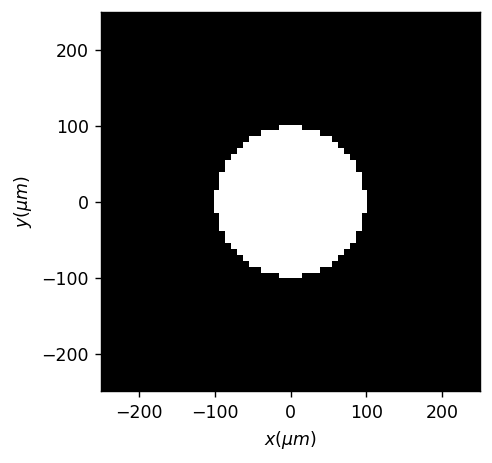

In [30]:
target = Scalar_mask_XY(x,y,wavelength)
target.circle(r0=(0,0), radius=100*um)
target.draw()

In [31]:
source=Scalar_source_XY(x,y,wavelength)
# source.plane_wave()
source.gauss_beam(r0=(0,0), w0=2500*mm, z0=0.0)

In [37]:
z_distance=5*mm
num_steps=300

## Algortimo estándar

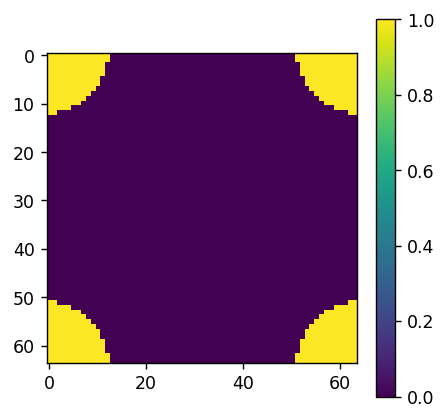

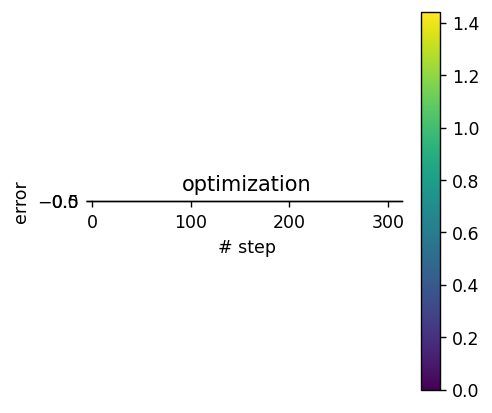

In [42]:
mask_final, errors=GS_scalar_far(source, target, num_steps, has_draw=True)



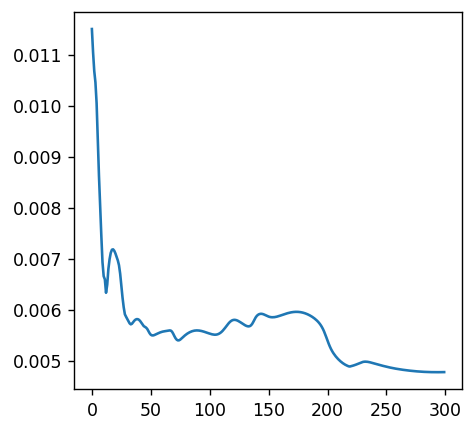

In [41]:
plt.plot(errors)

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f5298746cf8>)

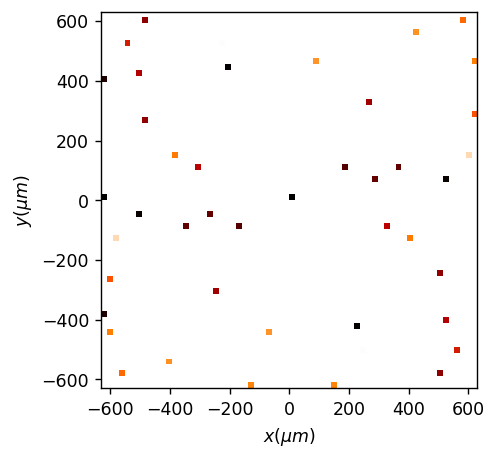

In [40]:
mask_final.draw()

## Generación del espacio de fases

Para ello tenemos una máscara, que invertimos (en campo lejano o cercano) y dibujamos el mapa de pixeles generados, en amplitud-fase y Ereal - Eimag

In [12]:
    errors = np.zeros(num_steps)

    z = 1 * mm
    x = target.x
    y = target.y
    num_x = len(x)
    num_y = len(y)
    wavelength = target.wavelength

    if source is None:
        source = Scalar_source_XY(x, y, wavelength)
        source.plane_wave()

    DOE = Scalar_mask_XY(x, y, wavelength)
    far_field = Scalar_mask_XY(x, y, wavelength)

    target_abs = np.fft.fftshift(np.abs(target.u))
    far_field.u = target_abs * np.exp(
        1j * 2 * np.pi * np.random.rand(num_y, num_x))
    I_result = target_abs**2
    I_result_mean = I_result.mean()

    for i in range(num_steps):
        DOE = far_field.ifft(z=z, shift=False)
        mask = np.angle(DOE.u)
        DOE.u = np.exp(1j * mask)
        field_z = DOE.fft(z=z, shift=False, matrix=True)
        I_z = np.abs(field_z)**2
        I_z = I_z * I_result_mean / I_z.mean()
        far_field.u = target_abs * np.exp(1j * np.angle(field_z))

        error = mean_square_error(I_result, I_z)
        print("{}/{} - error {:2.6f}".format(i, num_steps, error), end='\r')
        errors[i] = error

    if has_draw:
        plt.figure()
        plt.imshow(I_result)
        plt.colorbar()
        plt.figure()
        plt.imshow(I_z)
        plt.colorbar()

    if has_draw:
        plt.plot(errors, 'k', lw=2)
        plt.xlabel('# step')
        plt.ylabel('error')
        plt.title('optimization')
        plt.ylim(ymin=0)

    mask = np.fft.fftshift(mask)
    mask = (mask + np.pi) / (2 * np.pi)

    mask_final = Scalar_mask_XY(x, y, wavelength)
    mask_final.u = mask

    return mask_final, errors


**Campo lejano**

In [13]:
DOE = field_z.ifft(shift=False)


**Campo cercano**

In [14]:

z= z_distance
DOE = field_z.RS(z=-z, new_field=True)


In [15]:
E_real = np.real(DOE.u)
E_imag = np.imag(DOE.u)
amplitud = np.abs(DOE.u)
fase = np.angle(DOE.u)

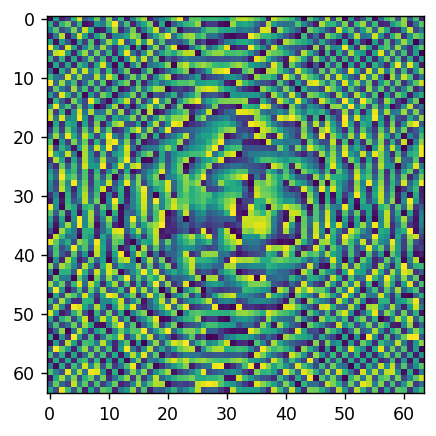

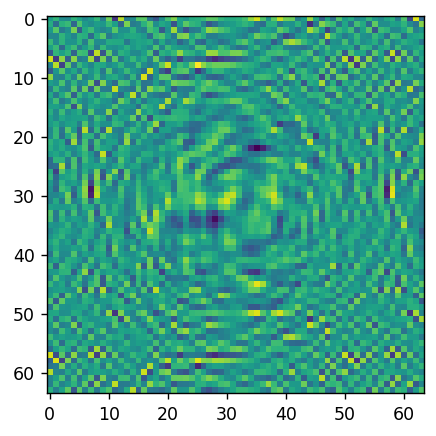

In [16]:
plt.figure()
plt.imshow(fase)

plt.figure()
plt.imshow(amplitud)
plt.colorbar()

plt.figure()
plt.imshow(E_real)

plt.figure()
plt.imshow(E_imag)

In [17]:
E_real = E_real.flatten()
E_imag = E_imag.flatten()
amplitud = amplitud.flatten()
fase = fase.flatten()

In [18]:
plt.figure()
plt.plot(E_real, E_imag, 'k.', ms=1)
plt.suptitle('nube de puntos')
plt.xlabel('$E_{real}$')
plt.ylabel('$E_{imag}$')

Text(0, 0.5, '$E_{imag}$')

La distribución de puntos no es uniforme, sino que está más centrada en el 0

In [19]:
plt.figure()
plt.plot(amplitud, fase, 'k.', ms=1)
plt.suptitle('nube de puntos')
plt.xlabel('$A$')
plt.ylabel('$\phi$')



Text(0, 0.5, '$\\phi$')

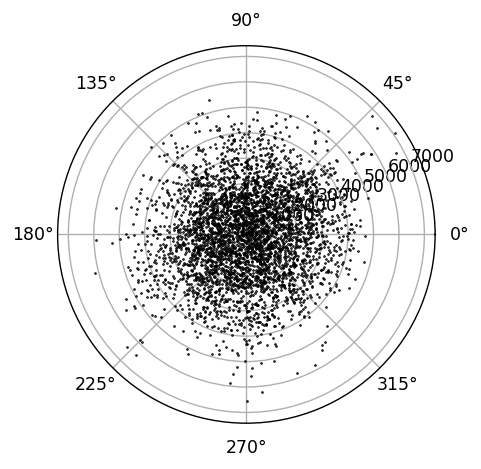

In [20]:
plt.polar(fase, amplitud, 'k.', ms=1)

In [21]:
mask_hist = E_real.flatten()
plt.hist(mask_hist, bins=140);

mask_hist = E_imag.flatten()
plt.hist(mask_hist, bins=140);

In [22]:
mask = np.angle(DOE.u)
DOE.u = np.exp(1j * mask)
field_z = (source * DOE).RS(z=z, new_field=True)
I_z = np.abs(field_z.u)**2
I_z = I_z * I_result_mean / I_z.mean()

field_z.u = u_target * np.exp(1j * np.angle(field_z.u))

error = mean_square_error(I_result, I_z)
print("{}/{} - error {:2.6f}".format(
    i, num_steps, error),
    end='\r')
errors[i] = error

NameError: name 'mean_square_error' is not defined

In [ ]:
mask = (mask + np.pi) / (2 * np.pi)



mask_final = Scalar_mask_XY(x, y, wavelength)
mask_final.u = mask

In [ ]:
mask_hist = mask.flatten()
plt.hist(mask_hist, bins=140)

In [ ]:
mask_final.draw()